*   Nama : Zaenal Arifin
*   Email: macelliot1997@gmail.com
*   Kota : Cilacap


In [1]:
#import & cek versi tensorflow
import tensorflow as tf
print(tf.__version__)

#persiapkan data - download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

2.4.1
--2021-05-09 17:26:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.27MB/s    in 4m 21s  

2021-05-09 17:30:29 (1.18 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
#persiapkan data - extract dataset
import zipfile,os
file_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_directory = '/tmp/rockpaperscissors/rps-cv-images'

In [3]:
#cek folder pada direktori base
os.listdir(base_directory)

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rock']

In [34]:
#proses Pre-processing data dengan image augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    brightness_range=[0.2,1.0],
                    fill_mode = 'nearest',
                    validation_split = 0.4)

#Mempersiapkan data latih yang akan dipelajari oleh model.
train_generator = train_data_generator.flow_from_directory(
  base_directory,
  target_size=(100, 150),
  shuffle=True,
  subset= 'training')

validation_generator = train_data_generator.flow_from_directory(
  base_directory,
  target_size=(100, 150), 
  subset= 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [35]:
#callback untuk menjaga tingkat akurasi
class callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.98):
            print("\nakurasi model sudah mencapai 98%!") 
            self.model.stop_training = True 
 
callbacks = callback()

In [36]:
#Membangun arsitektur model dengan CNN.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [37]:
#Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20, 
      validation_data = validation_generator, 
      validation_steps=5,
      callbacks=[callbacks]
)  

Epoch 1/20
25/25 [==============================] - 41s 2s/step - loss: 1.1342 - accuracy: 0.3456 - val_loss: 0.9621 - val_accuracy: 0.4875
Epoch 2/20
25/25 [==============================] - 39s 2s/step - loss: 0.9127 - accuracy: 0.5840 - val_loss: 0.9495 - val_accuracy: 0.6313
Epoch 3/20
25/25 [==============================] - 39s 2s/step - loss: 0.6309 - accuracy: 0.7739 - val_loss: 0.2894 - val_accuracy: 0.9187
Epoch 4/20
25/25 [==============================] - 38s 2s/step - loss: 0.2877 - accuracy: 0.9075 - val_loss: 0.2869 - val_accuracy: 0.9062
Epoch 5/20
25/25 [==============================] - 38s 2s/step - loss: 0.2593 - accuracy: 0.8982 - val_loss: 0.2975 - val_accuracy: 0.9062
Epoch 6/20
25/25 [==============================] - 37s 1s/step - loss: 0.2297 - accuracy: 0.9307 - val_loss: 0.1941 - val_accuracy: 0.9500
Epoch 7/20
25/25 [==============================] - 37s 1s/step - loss: 0.1824 - accuracy: 0.9348 - val_loss: 0.2527 - val_accuracy: 0.9125
Epoch 8/20
25/25 [==

Saving 0vugygEjxQJPr9yz.png to 0vugygEjxQJPr9yz.png
0vugygEjxQJPr9yz.png
paper


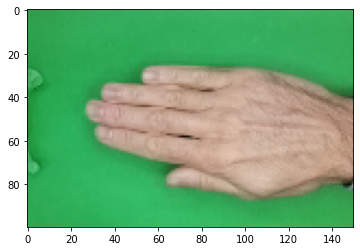

In [38]:
#Prediksi gambar ruangan bersih dan ruangan rapi untuk mengetes model.
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissor')